In [7]:
# CADASTRO DE PROFESSOR

import ipywidgets as widgets
from IPython.display import display
import oracledb

# Função para registrar um novo professor
def register_professor(name, username, password):
    try:
        # Conectar ao banco de dados Oracle
        with oracledb.connect(
            user='RM99667',
            password='260903',
            dsn='oracle.fiap.com.br:1521/ORCL',
            config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
        ) as connection:
            with connection.cursor() as cursor:
                # Executar a instrução SQL para inserir um novo professor
                cursor.execute("""
                    INSERT INTO RM99210.Cadastro_Professor (ID_PROFESSOR, NM_PROFESSOR, LOGIN, SENHA)
                    VALUES (RM99210.seq_professor_id.NEXTVAL, :1, :2, :3)
                """, (name, username, password))
                # Confirmar a transação
                connection.commit()
                print("Professor registered successfully!")
    except oracledb.IntegrityError as e:
        error, = e.args
        if error.code == 1:
            print("Error: Username already exists.")
        else:
            print(f"Database error: {error.message}")

# Widgets para o registro
name_widget_register = widgets.Text(description='Name:')  # Campo de texto para o nome
username_widget_register = widgets.Text(description='Username:')  # Campo de texto para o nome de usuário
password_widget_register = widgets.Password(description='Password:')  # Campo de senha
register_button = widgets.Button(description='Register')  # Botão de registro

# Função para lidar com o clique do botão de registro
def on_register_button_clicked(b):
    # Obter os valores dos widgets
    name = name_widget_register.value
    username = username_widget_register.value
    password = password_widget_register.value
    # Chamar a função de registro do professor
    register_professor(name, username, password)

# Anexar o evento de clique ao botão de registro
register_button.on_click(on_register_button_clicked)

# Exibir os widgets
print("Register:")
display(name_widget_register, username_widget_register, password_widget_register, register_button)

Register:


Text(value='', description='Name:')

Text(value='', description='Username:')

Password(description='Password:')

Button(description='Register', style=ButtonStyle())

In [8]:
# LOGIN PROFESSOR

import ipywidgets as widgets
from IPython.display import display
import oracledb

# Função para fazer o login do professor
def login_professor(username, password):
    with oracledb.connect(
        user='RM99667',
        password='260903',
        dsn='oracle.fiap.com.br:1521/ORCL',
        config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
    ) as connection:
        with connection.cursor() as cursor:
            cursor.execute("""
                SELECT COUNT(*) FROM RM99210.Cadastro_Professor
                WHERE LOGIN = :1 AND SENHA = :2
            """, (username, password))
            result = cursor.fetchone()
            if result[0] > 0:
                print("Login successful!")
            else:
                print("Invalid username or password.")

# Widgets para o nome de usuário e senha
username_widget = widgets.Text(description='Username:')
password_widget = widgets.Password(description='Password:')
login_button = widgets.Button(description='Login')
error_label = widgets.Label(value='', layout=widgets.Layout(color='red'))

# Função para lidar com o clique do botão de login
def on_login_button_clicked(b):
    username = username_widget.value.strip()
    password = password_widget.value.strip()
    
    # Verificar se todos os campos estão preenchidos
    if not username or not password:
        error_label.value = "Por favor, preencha todos os campos."
        return
    
    error_label.value = ''  # Clear any previous error message
    login_professor(username, password)

# Anexar o evento de clique ao botão de login
login_button.on_click(on_login_button_clicked)

# Exibir os widgets
print("Login:")
display(username_widget, password_widget, login_button, error_label)

Login:


Text(value='', description='Username:')

Password(description='Password:')

Button(description='Login', style=ButtonStyle())

Label(value='')

['nome', 'tentativa', 'tempo']
nome          object
tentativa      int64
tempo        float64
dtype: object
      nome  tentativa    tempo  evolucao_percentual
20   Andre          1  125.015             0.000000
21   Andre          2  100.023           -19.991201
22   Andre          3   85.032           -14.987553
23   Andre          4   79.052            -7.032647
24   Andre          5   72.021            -8.894146
15  Felipe          1  100.032             0.000000
16  Felipe          2   92.042            -7.987444
17  Felipe          3   91.012            -1.119054
18  Felipe          4   75.015           -17.576803
19  Felipe          5   64.020           -14.657069
10   Julia          1   99.044             0.000000
11   Julia          2   85.012           -14.167441
12   Julia          3   76.023           -10.573801
13   Julia          4   61.033           -19.717717
14   Julia          5   57.025            -6.566939
5     Luis          1  110.025             0.000000
6     Lu

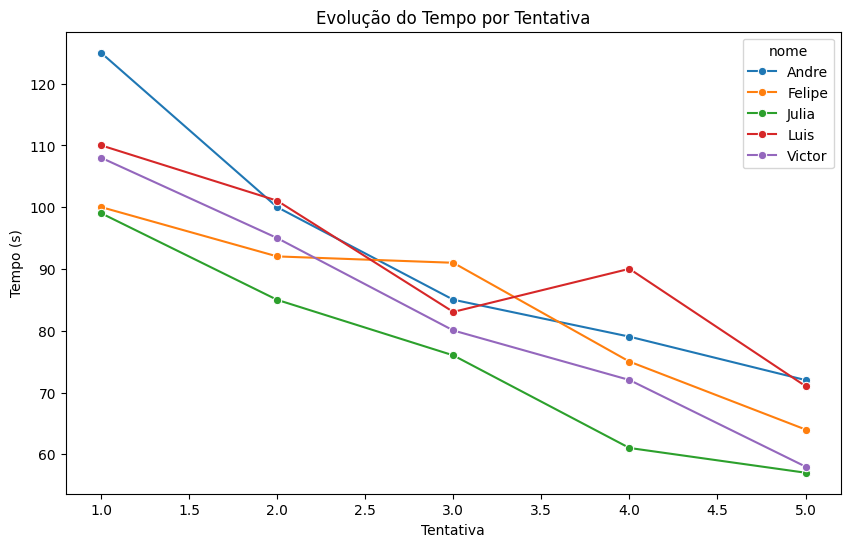

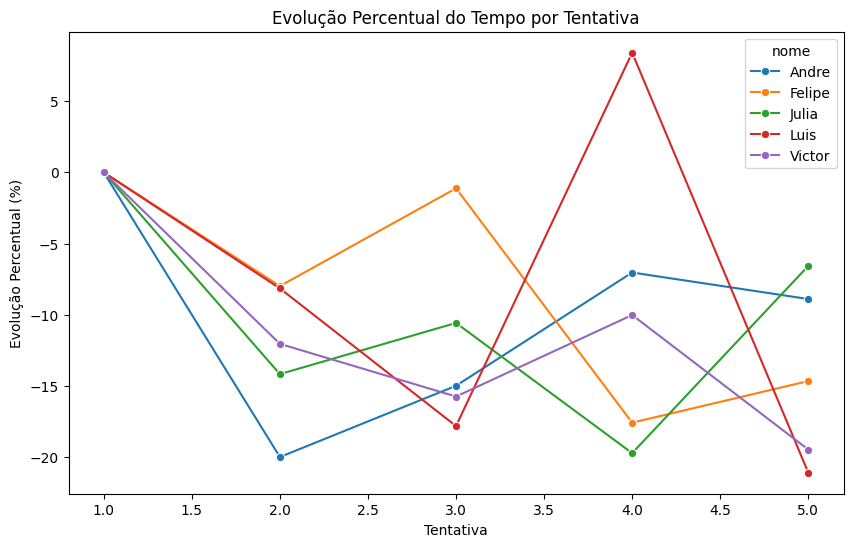

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Função para converter tempo no formato MM:SS:MS para segundos
def time_to_seconds(time_str):
    m, s, ms = map(int, time_str.split(':'))
    return m * 60 + s + ms / 1000

# Criar DataFrame a partir do arquivo CSV com delimitador ponto e vírgula
df = pd.read_csv('tempos.csv', delimiter=';')

# Mostrar as colunas do DataFrame como uma lista
print(list(df.columns))

# Remover espaços em branco e caracteres especiais da coluna 'tempo'
df['tempo'] = df['tempo'].str.strip()

# Converter a coluna 'tempo' para segundos
df['tempo'] = df['tempo'].apply(time_to_seconds)

# Mostrar os tipos de dados para verificar a conversão
print(df.dtypes)

# Ordenar o DataFrame por nome e tentativa
df = df.sort_values(by=['nome', 'tentativa'])

# Calcular a evolução percentual do tempo para cada pessoa
df['evolucao_percentual'] = df.groupby('nome')['tempo'].pct_change() * 100

# Preencher valores NaN resultantes da primeira tentativa com 0
df['evolucao_percentual'] = df['evolucao_percentual'].fillna(0)

# Mostrar o DataFrame atualizado
print(df)

# Calcular a média da evolução percentual total
media_evolucao_percentual_total = df['evolucao_percentual'].mean()

# Remover o sinal negativo e formatar com 3 casas decimais e o símbolo de %
media_evolucao_percentual_total = abs(media_evolucao_percentual_total)
media_evolucao_percentual_total_formatada = f"{media_evolucao_percentual_total:.3f}%"

# Mostrar a média da evolução percentual total formatada
print("Média Total da Evolução Percentual:")
print(media_evolucao_percentual_total_formatada)

# Criar gráfico de linhas para comparar a evolução do tempo de cada pessoa ao passar das tentativas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='tentativa', y='tempo', hue='nome', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Evolução do Tempo por Tentativa')
plt.xlabel('Tentativa')
plt.ylabel('Tempo (s)')

# Mostrar o gráfico
plt.show()

# Criar gráfico de linhas para comparar a evolução percentual do tempo de cada pessoa ao passar das tentativas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='tentativa', y='evolucao_percentual', hue='nome', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Evolução Percentual do Tempo por Tentativa')
plt.xlabel('Tentativa')
plt.ylabel('Evolução Percentual (%)')

# Mostrar o gráfico
plt.show()